# AI Global Index Dataset

### Import Libraries

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
import polars as pl

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# XAI
import shap

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             ConfusionMatrixDisplay, f1_score, 
                             classification_report)

## About the Dataset

The Dataset "AI Global index" includes The Global AI Index itself and seven indicators affecting the Index on 62 countries, as well as general information about the countries (region, cluster, income group and political regime).

The Global AI Index is the first index to benchmark nations on their level of investment, innovation and implementation of artificial intelligence.

Talent, Infrastructure and Operating Environment are the factors of AI Implementation group of indicators, which represents the application of artificial intelligence by professionals in various sectors, such as businesses, governments, and communities.

Talent indicator focuses on the availability of skilled practitioners for the provision of artificial intelligence solutions.
Infrastructure indicator focuses on the reliability and scale of access infrastructure, from electricity and internet, to super computing capabilities.
Operating Environment indicator focuses on the regulatory context, and public opinion surrounding artificial intelligence.
Research and Development are the factors of Innovation group of indicators, which reflects the progress made in technology and methodology, which signify the potential for artificial intelligence to evolve and improve.

Research indicator focuses on the extent of specialist research and researchers; investigating the amount of publications and citations in credible academic journals.
Development indicator focuses on the development of fundamental platforms and algorithms upon which innovative artificial intelligence projects rely.
Government Strategy and Commercial are the factors of Investment group of indicators, which reflects financial and procedural commitments to artificial intelligence.

Government Strategy indicator focuses on the depth of commitment from national government to artificial intelligence; investigating spending commitments and national strategies.
Commercial indicator focuses on the level of startup activity, investment and business initiatives based on artificial intelligence.
All these seven indicators were calculated by Tortoise Media via weighting and summarizing 143 other indicators.

The data was used in the analytical article research Artificial Intelligence on the World Stage: Dominant Players and Aspiring Challengers

In [2]:
ai_index = pd.read_csv("AI_index_db.csv")
ai_index_pl = pl.read_csv("AI_index_db.csv")

In [3]:
ai_index.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


## Understanding the Dataset

### Exploratory Data Analysis

In [4]:
ai_index_pl.describe()

statistic,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str
"""count""","""62""",62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,"""62""","""62""","""62""","""62"""
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0"""
"""mean""",null,16.803065,63.50371,66.925484,16.61,14.824677,57.865645,6.171935,23.914677,null,null,null,null
"""std""",null,15.214963,20.217525,20.000424,17.413996,19.419279,26.252448,14.029632,15.123586,null,null,null,null
"""min""","""Argentina""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Africa""","""Nascent""","""High""","""Closed autocracy"""
"""25%""",null,7.28,55.76,58.01,2.97,1.09,40.35,0.67,14.66,null,null,null,null
"""50%""",null,13.46,65.36,70.15,13.63,9.09,64.28,2.64,24.45,null,null,null,null
"""75%""",null,24.99,76.2,80.66,25.48,19.99,78.14,5.31,30.53,null,null,null,null
"""max""","""Vietnam""",100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,"""Middle East""","""Waking up""","""Upper middle""","""Liberal democracy"""


In [5]:
ai_index['Country'].unique()

array(['United States of America', 'China', 'United Kingdom', 'Canada',
       'Israel', 'Singapore', 'South Korea', 'The Netherlands', 'Germany',
       'France', 'Australia', 'Ireland', 'Finland', 'Denmark',
       'Luxembourg', 'Japan', 'India', 'Switzerland', 'Sweden',
       'Hong Kong', 'Spain', 'Austria', 'Estonia', 'Taiwan', 'Norway',
       'Saudi Arabia', 'Belgium', 'Poland', 'Slovenia', 'New Zealand',
       'Italy', 'Russia', 'Malta', 'United Arab Emirates', 'Portugal',
       'Czech Republic', 'Iceland', 'Lithuania', 'Brazil', 'Greece',
       'Slovakia', 'Hungary', 'Malaysia', 'Mexico', 'Chile', 'Argentina',
       'Qatar', 'Turkey', 'Colombia', 'Uruguay', 'Bahrain', 'Vietnam',
       'Indonesia', 'Tunisia', 'South Africa', 'Morocco', 'Armenia',
       'Sri Lanka', 'Egypt', 'Kenya', 'Nigeria', 'Pakistan'], dtype=object)

In [6]:
ai_index['Region'].unique()

array(['Americas', 'Asia-Pacific', 'Europe', 'Middle East', 'Africa'],
      dtype=object)

In [7]:
ai_index['Cluster'].unique()

array(['Power players', 'Traditional champions', 'Rising stars',
       'Waking up', 'Nascent'], dtype=object)

In [8]:
ai_index['Income group'].unique()

array(['High', 'Upper middle', 'Lower middle'], dtype=object)

In [9]:
ai_index['Political regime'].unique()

array(['Liberal democracy', 'Closed autocracy', 'Electoral democracy',
       'Electoral autocracy'], dtype=object)

### Preprocessing

In [10]:
le = LabelEncoder()

In [11]:
ai_index['Region'] = le.fit_transform(ai_index['Region'])
ai_index['Cluster'] = le.fit_transform(ai_index['Cluster'])
ai_index['Income group'] = le.fit_transform(ai_index['Income group'])
ai_index['Political regime'] = le.fit_transform(ai_index['Political regime'])

### Data Visualizations

#### Indicator Score Distribution

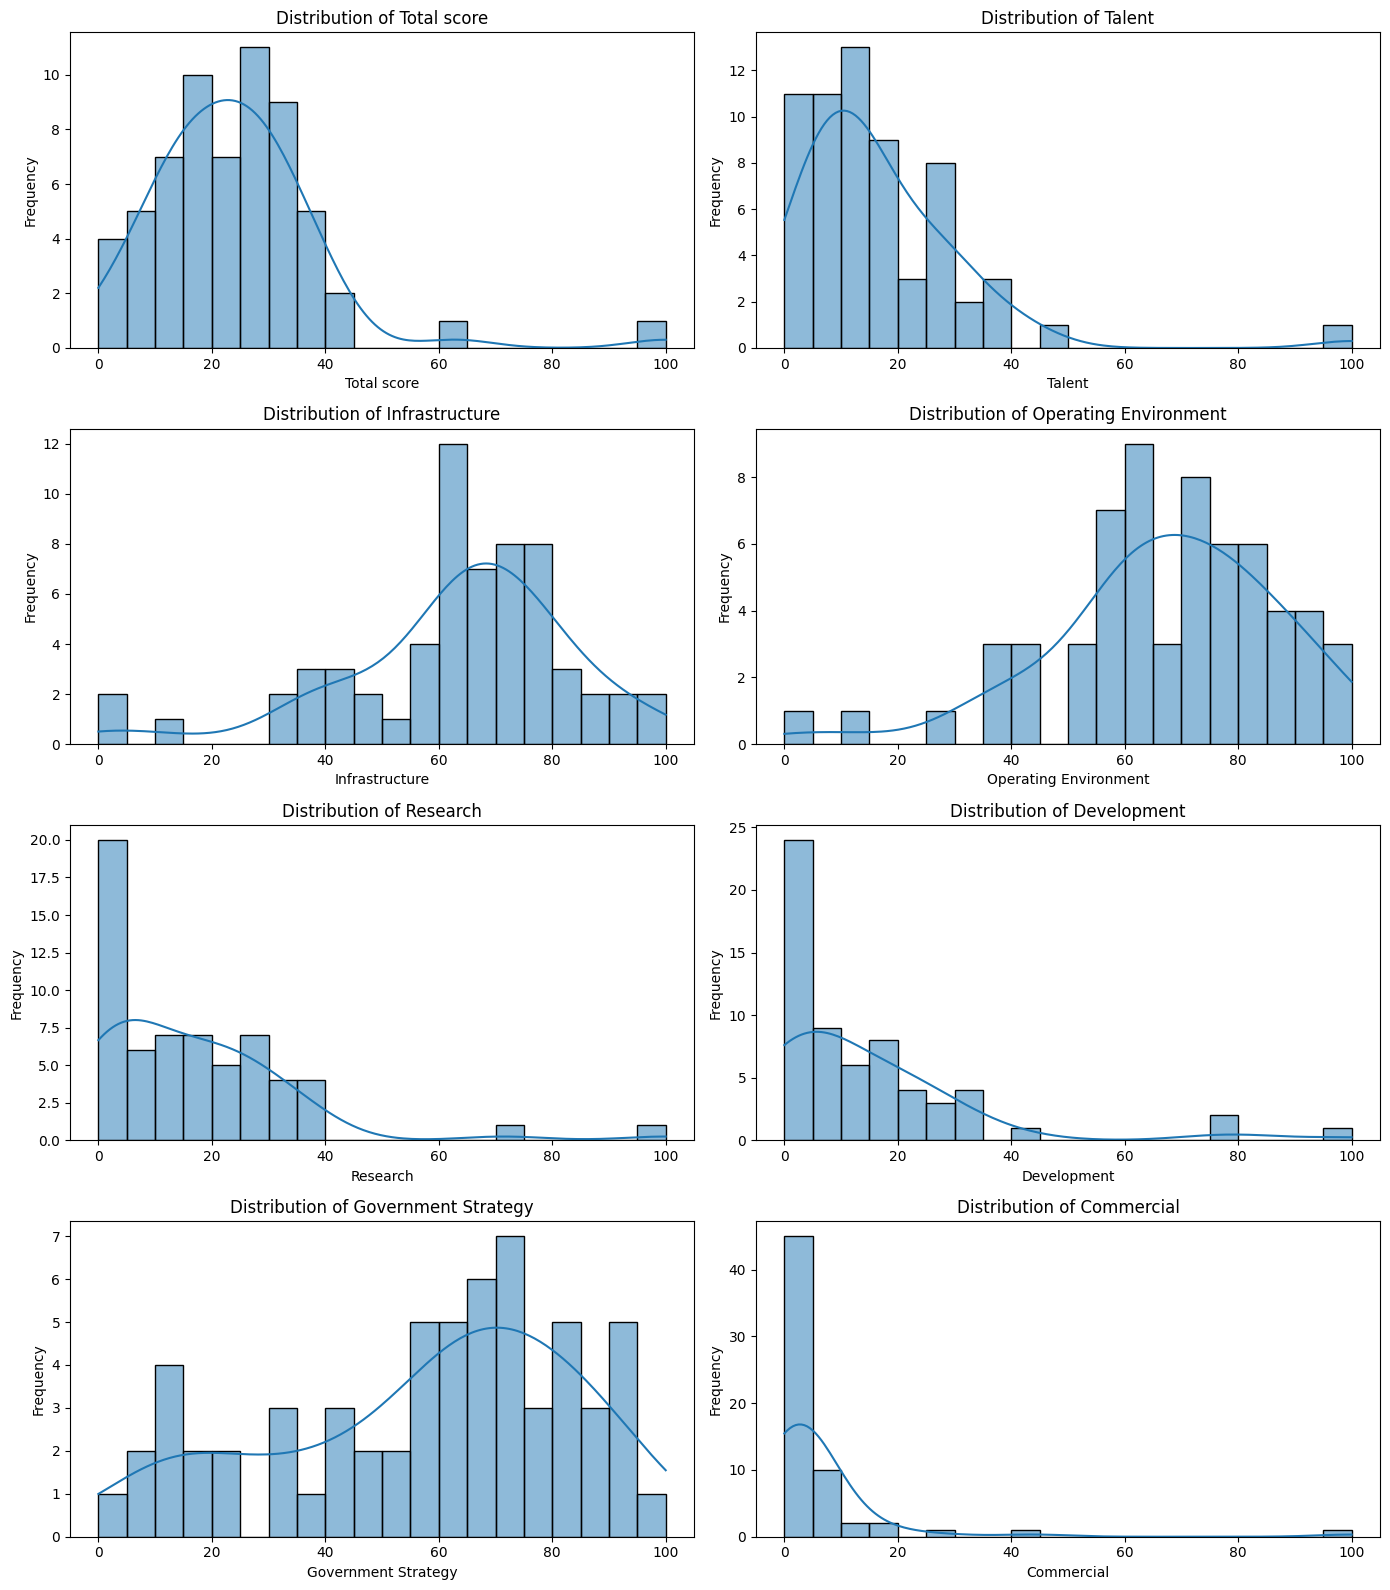

In [ ]:
features = ['Total score', 'Talent', 'Infrastructure', 'Operating Environment', 'Research',
            'Development', 'Government Strategy', 'Commercial']

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(ai_index[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

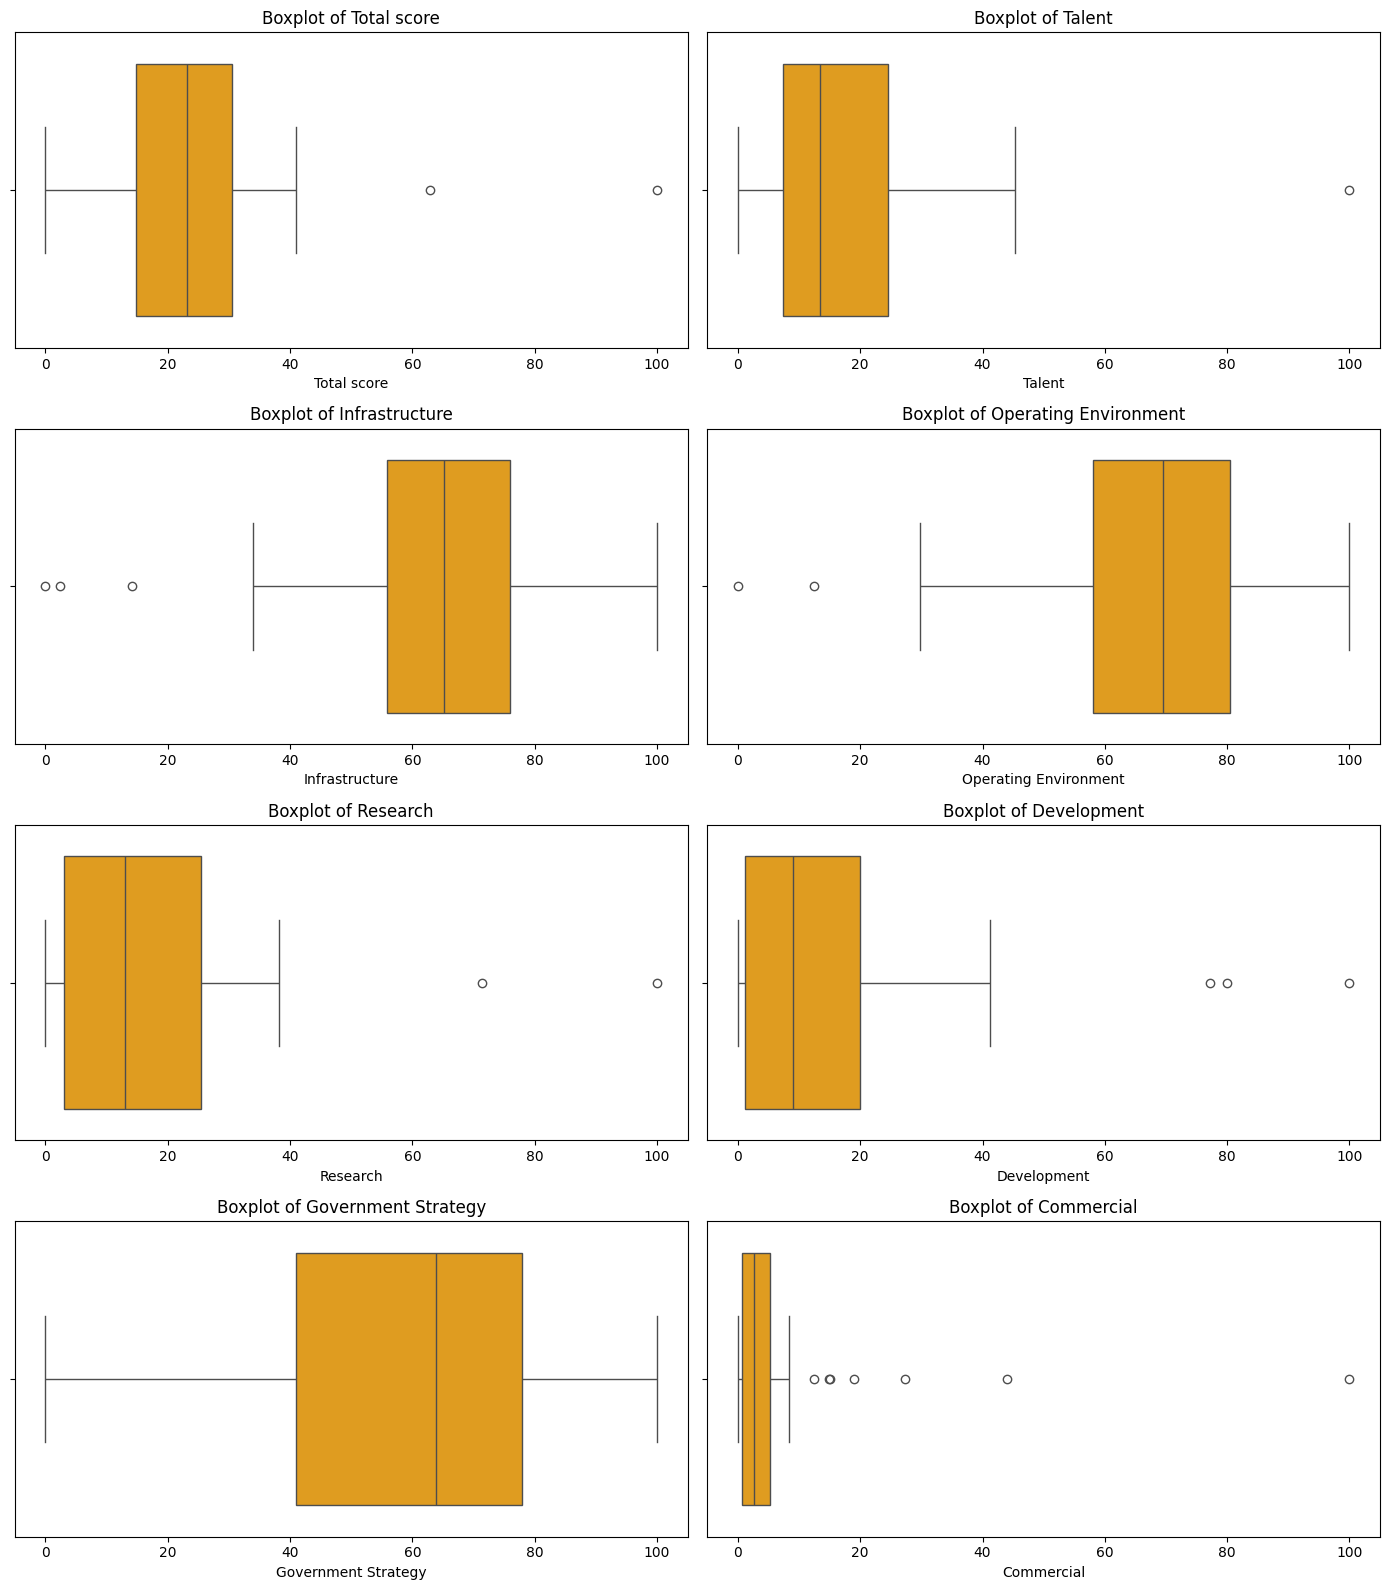

In [79]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x=ai_index[col], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### Indicator Score Distribution per Region

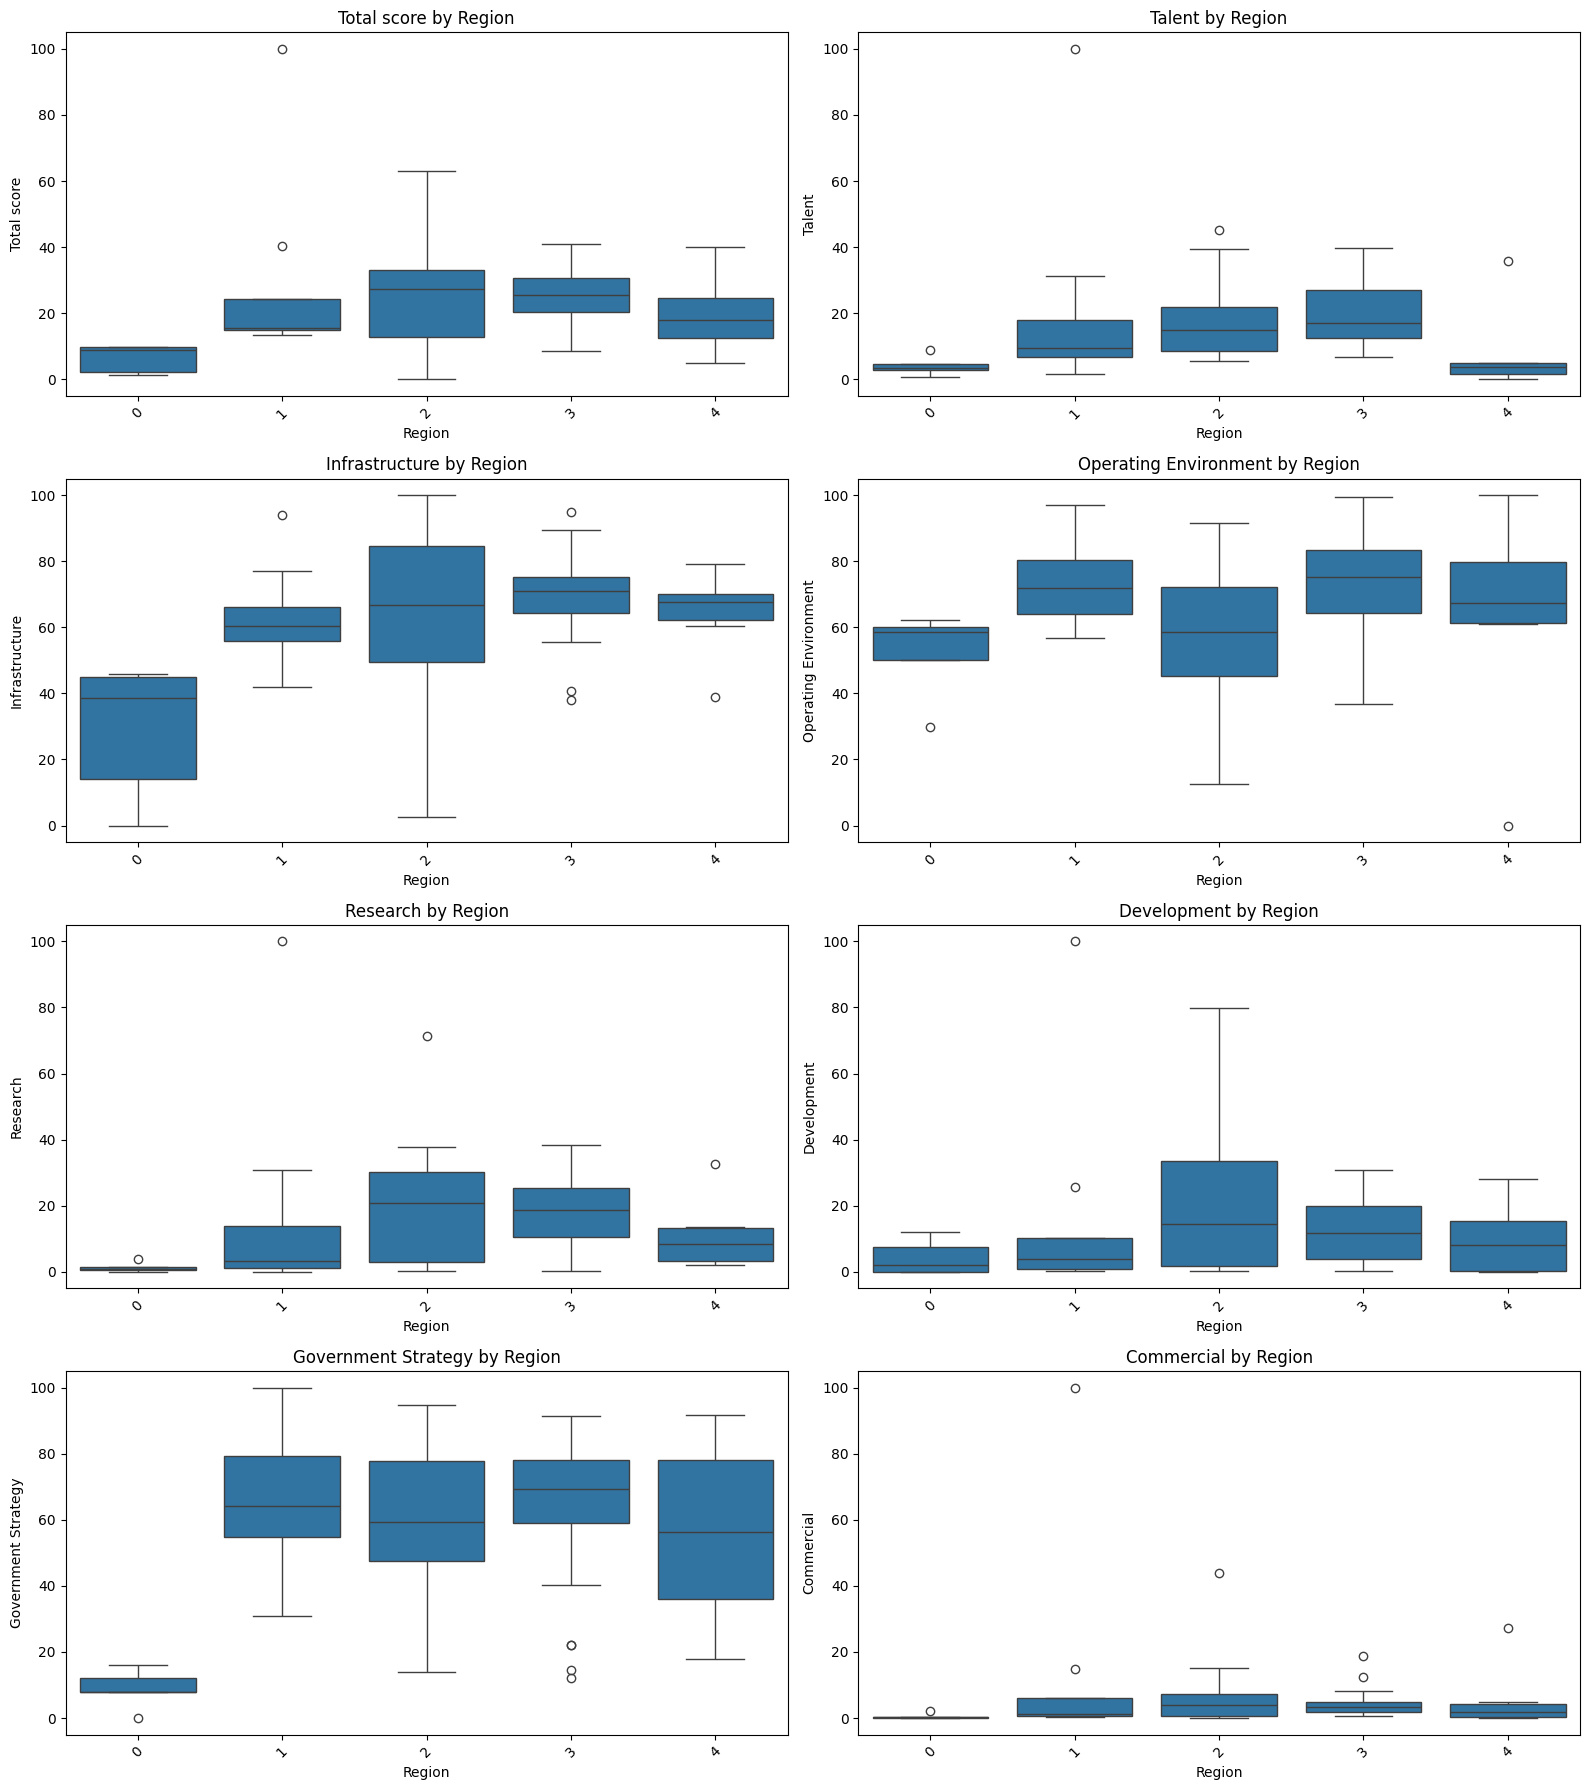

In [80]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Region', y=col, data=ai_index, ax=axes[i])
    axes[i].set_title(f'{col} by Region')
    axes[i].set_xlabel('Region')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Pairplot of Fields

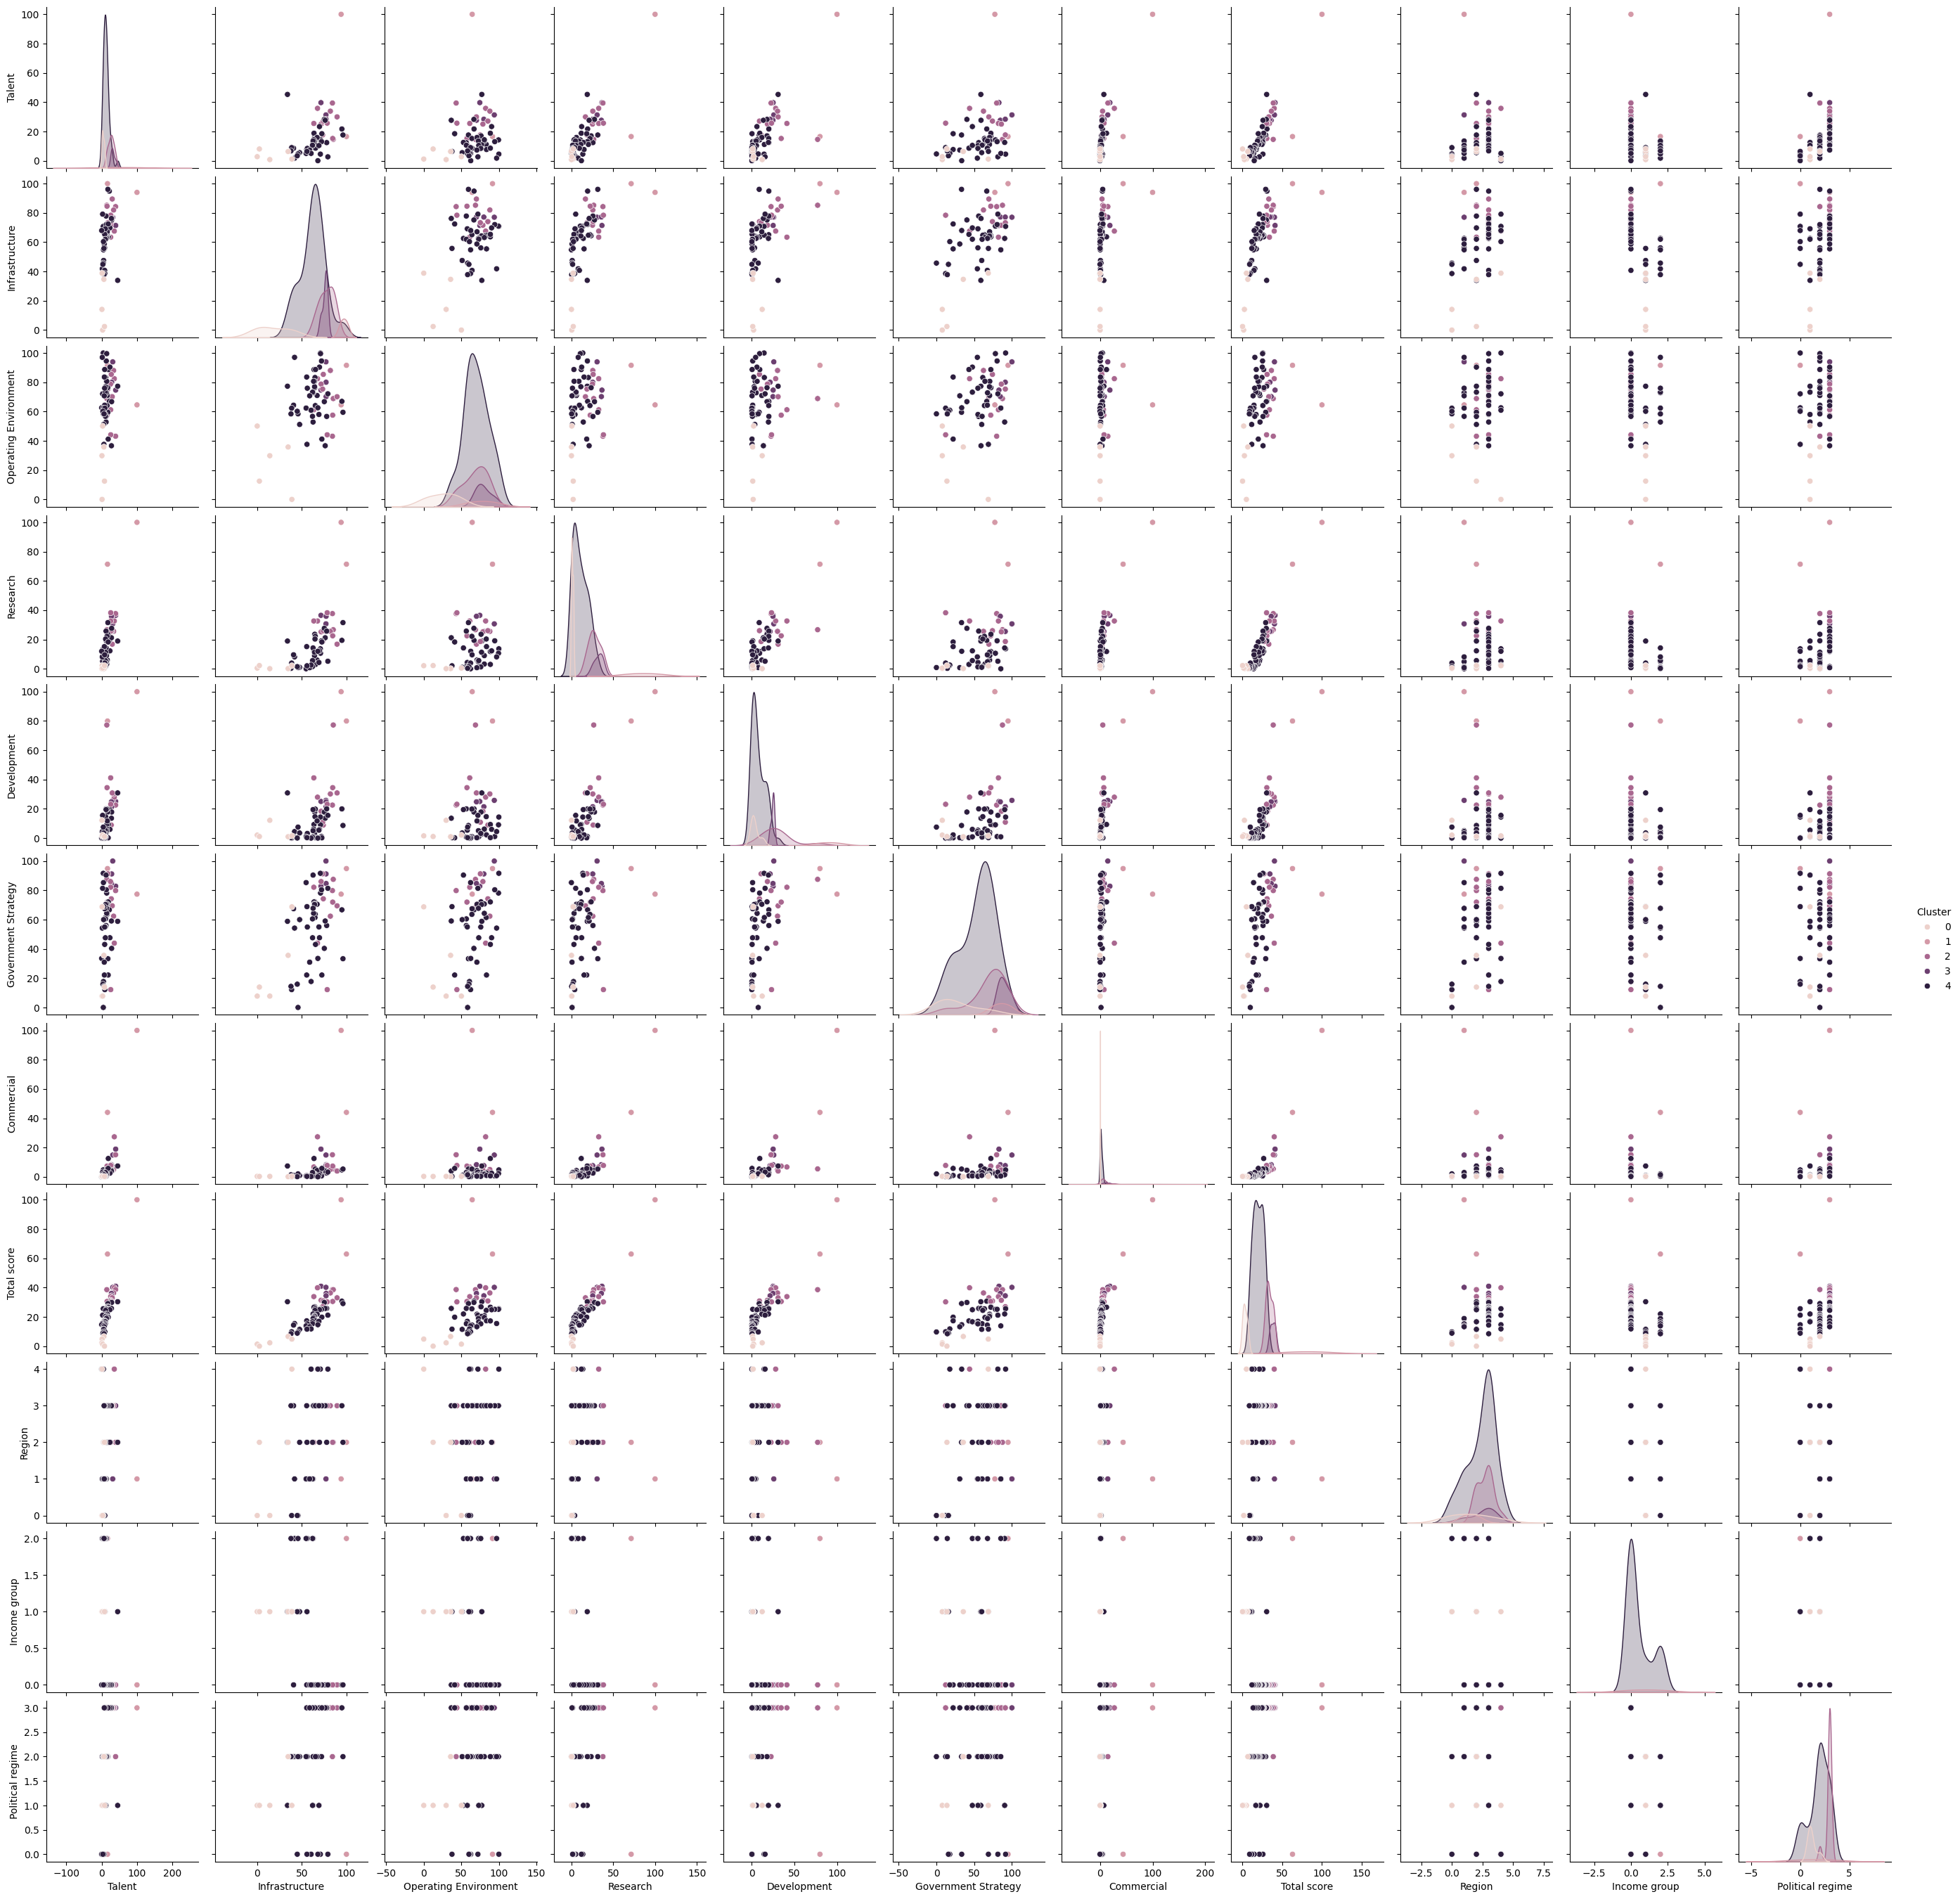

In [13]:
sns.pairplot(ai_index, hue="Cluster")
plt.show()

#### Correlation Heatmap of Numerical Fields

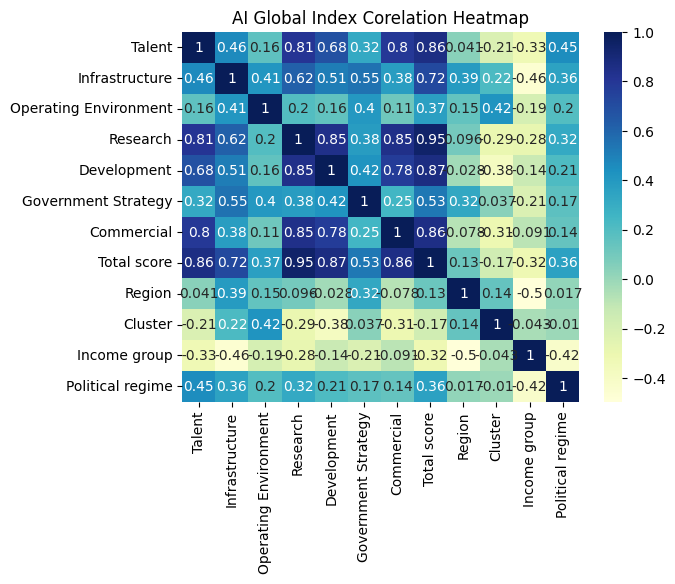

In [14]:
corr = ai_index.corr(numeric_only=True)
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("AI Global Index Corelation Heatmap")
plt.show()

## Gaining Insights for Creating the Dashboard

### Model Preparation

In [ ]:
score_columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research',
                'Development', 'Government Strategy', 'Commercial']
X = ai_index[score_columns]
y = ai_index['Total score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

### Regression: Linear Regression

In [51]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2 Score: 0.9999999752683308
RMSE: 1.4238816918726057e-05


In [52]:
coefficients = lr.coef_
coef_df = pd.DataFrame({
    'Feature': score_columns,
    'Coefficient': coefficients,
    'Abs Coefficient': abs(coefficients)
}).sort_values(by='Abs Coefficient', ascending=False)

C:\Users\PC Jana\AppData\Local\Temp\ipykernel_16024\3445529519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


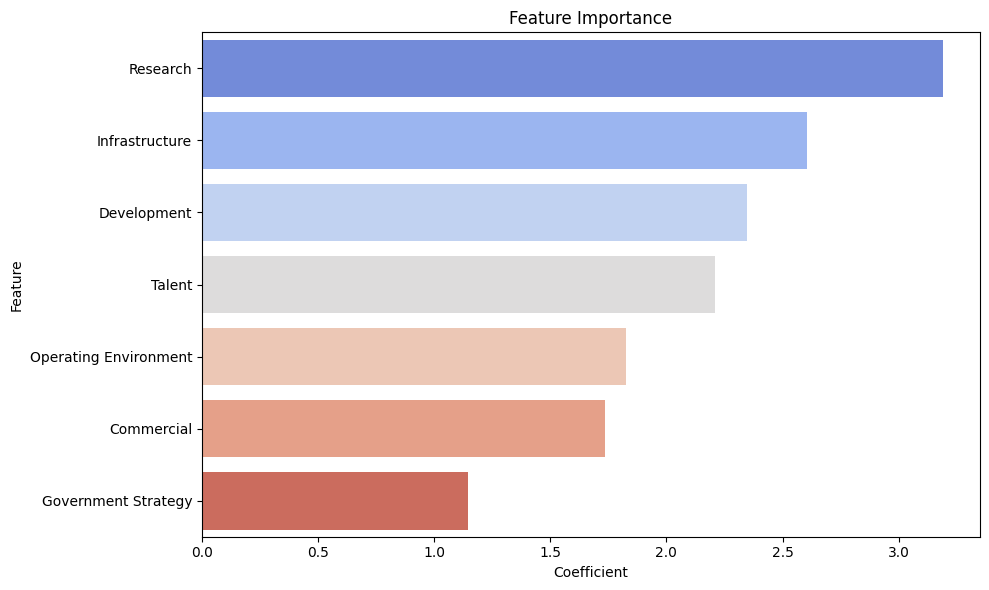

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

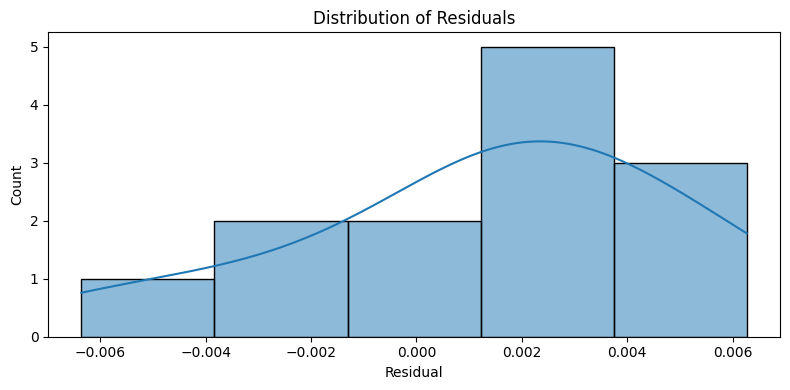

In [54]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

### XAI: SHAP

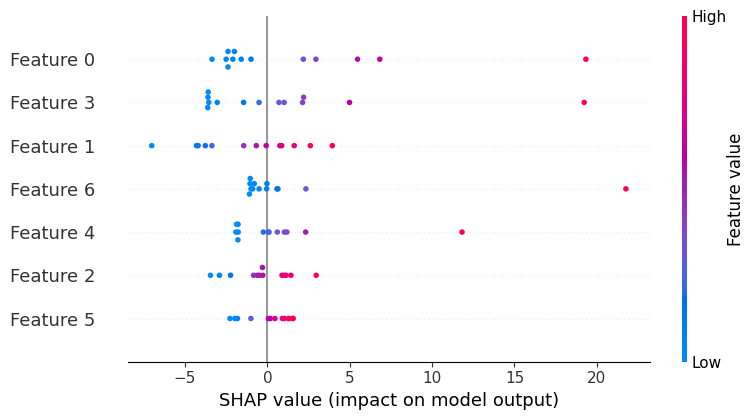

In [57]:
explainer = shap.Explainer(lr, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled)

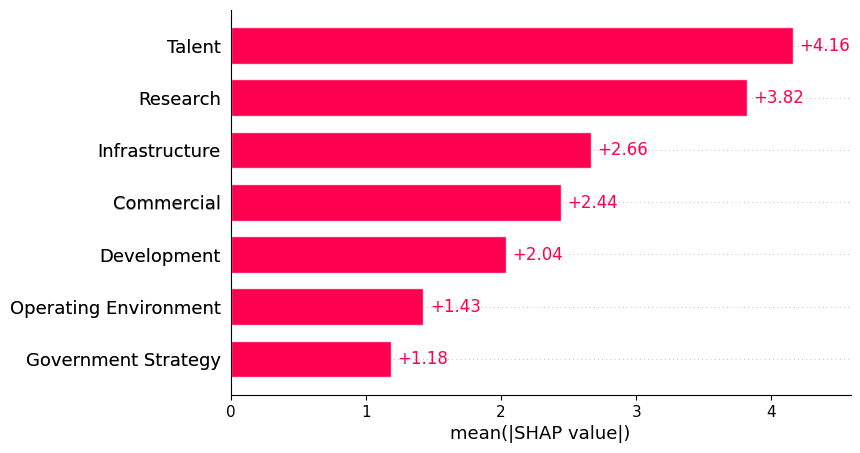

In [56]:
shap_values.feature_names = score_columns
shap.plots.bar(shap_values)

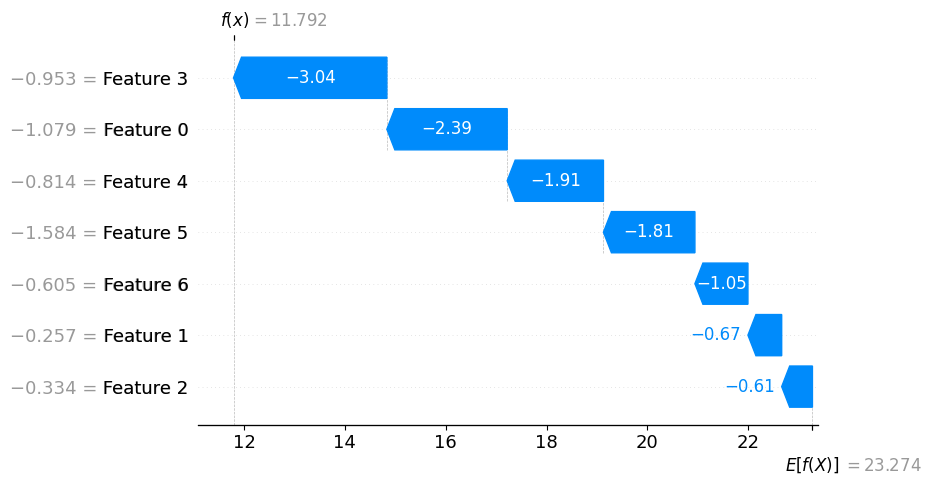

In [58]:
shap.plots.waterfall(shap_values[0])

### Clustering: K-Means

In [59]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
ai_index['Cluster (KMeans)'] = clusters

In [60]:
print("Silhouette Score: ", silhouette_score(X_scaled, clusters))

Silhouette Score:  0.2896338847098575


In [61]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

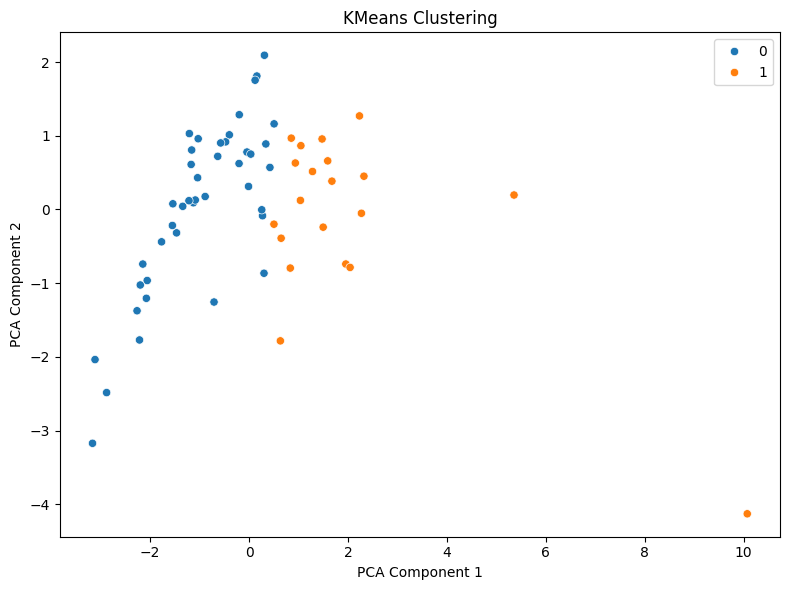

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=clusters)
plt.title("KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

### Classification: Naive Bayes

In [78]:
X = ai_index[score_columns].values
y = ai_index['Cluster'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=52, stratify=y)

nb = GaussianNB()
nb.fit(X, y)

y_pred = nb.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9230769230769231
F1 Score: 0.9128205128205129
